In [2]:
import numpy as np
import torch
import torch.nn as nn
# import skimage

import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import Resize, Compose, ToTensor, Normalize
from torch.nn import Linear, ReLU, Sequential
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
# import tqdm

In [6]:
class SineLayer(nn.Module):
    def __init__(self, in_features, out_features, is_first=False, omega=30):
        super().__init__()
        self.omega = omega
        self.is_first = is_first
        self.in_features = in_features
        self.linear = nn.Linear(in_features, out_features)

        self.init_weights()
      
    def init_weights(self):
        """Initialize weights for a layer."""
        with torch.no_grad():
            if self.is_first:
                self.linear.weight.uniform_(-1 / self.in_features, 1 / self.in_features)
            else:
                self.linear.weight.uniform_(-np.sqrt(6 / self.in_features) / self.omega, 
                                            np.sqrt(6 / self.in_features) / self.omega)
                  
        
    def forward(self, x):
        """
        Parameters
        ----------
        x: tensor
            (n_samples, in_features)

        Returns
        ----------
        tensor
            shape (n_samples, out_features)
        """
        return torch.sin(self.omega * self.linear(x))


class Siren(nn.Module):
    def __init__(self, in_features, hidden_features, hidden_layers, 
                 out_features, first_omega=30, hidden_omega=30):
        super().__init__()

        self.net = []
        self.net.append(SineLayer(in_features, hidden_features, is_first=True, omega=first_omega))

        for _ in range(hidden_layers):
            self.net.append(SineLayer(hidden_features, hidden_features, is_first=False, omega=hidden_omega))
          
        final_layer = nn.Linear(hidden_features, out_features)
        with torch.no_grad():
            final_layer.weight.uniform_(-np.sqrt(6 / hidden_features) / hidden_omega, 
                                         np.sqrt(6 / hidden_features) / hidden_omega)
                
        self.net.append(final_layer)

        self.net = nn.Sequential(*self.net)

      
    def forward(self, x):
        return self.net(x)

In [14]:
# preprocess pil image and return tensor
def get_img_tensor(sidelength):
    img = Image.open('/content/salad.jpg')
       
    transform = Compose([
        Resize(sidelength),
        ToTensor(),
        Normalize(torch.Tensor([0.5]), torch.Tensor([0.5]))
    ])
    img = transform(img)
    return img

In [8]:
class MyDataset(Dataset):
    def __init__(self, sidelength):
        super().__init__()
        img = get_img_tensor(sidelength)
        self.pixels = img.permute(1, 2, 0)
        self.coords = get_mgrid(sidelength, 2)

    def __len__(self):
        return 3

    def __getitem__(self, idx):    
        if idx > 0: raise IndexError
            
        return self.coords, self.pixels

### Load data

In [19]:
def get_mgrid(sidelen, dim=3):
    '''Generates a flattened grid of (x,y,...) coordinates in a range of -1 to 1.'''
    tensors = tuple(dim * [torch.linspace(-1, 1, steps=sidelen)])
    mgrid = torch.stack(torch.meshgrid(*tensors), dim=-1)
    mgrid = mgrid.reshape(-1, dim)
    return mgrid

### Training

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 0, Total loss 0.309445


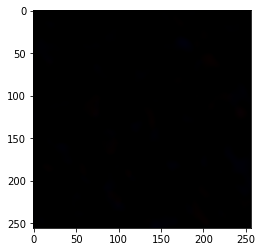

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 20, Total loss 0.069074


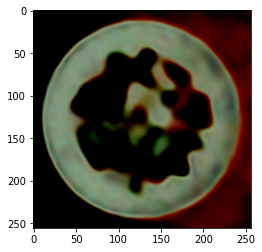

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 40, Total loss 0.039869


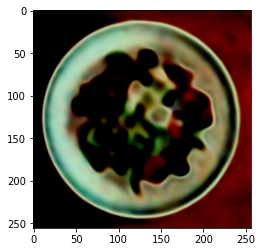

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 60, Total loss 0.033701


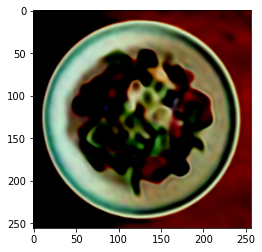

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 80, Total loss 0.030216


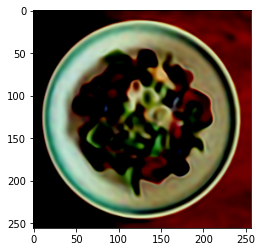

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 100, Total loss 0.026829


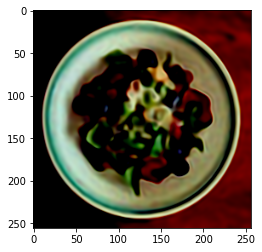

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 120, Total loss 0.023270


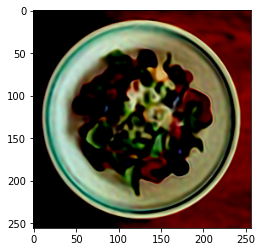

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 140, Total loss 0.020058


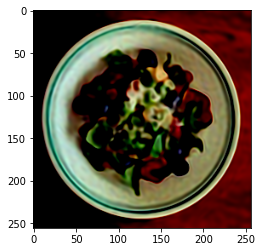

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 160, Total loss 0.017880


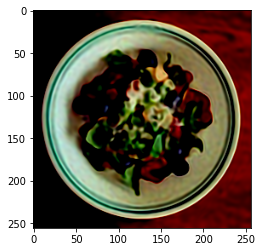

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 180, Total loss 0.015885


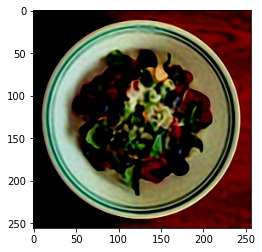

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 200, Total loss 0.014302


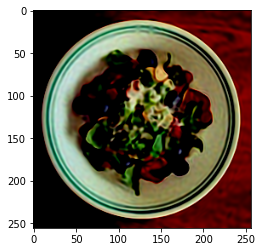

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 220, Total loss 0.012987


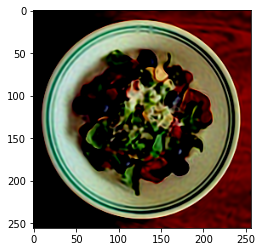

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 240, Total loss 0.011887


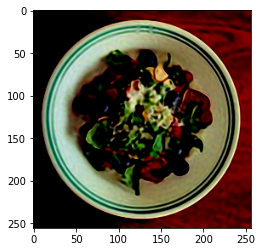

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 260, Total loss 0.010945


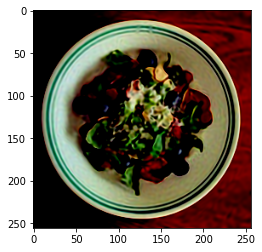

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 280, Total loss 0.010015


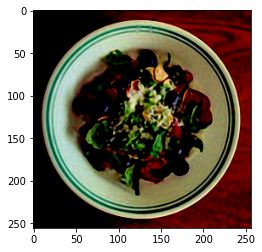

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 300, Total loss 0.009312


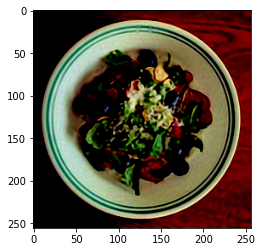

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 320, Total loss 0.008618


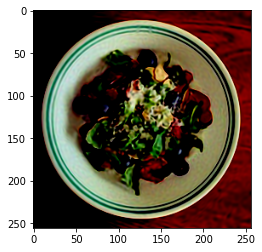

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 340, Total loss 0.007956


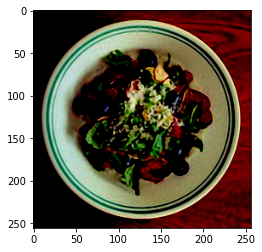

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 360, Total loss 0.007429


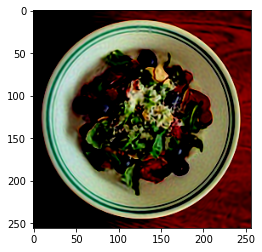

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 380, Total loss 0.006933


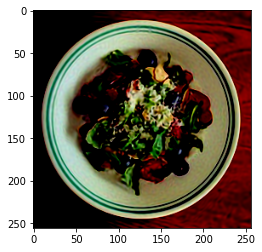

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 400, Total loss 0.006555


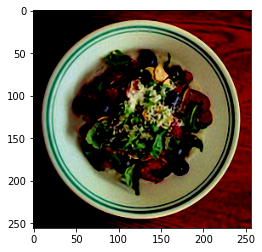

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 420, Total loss 0.006074


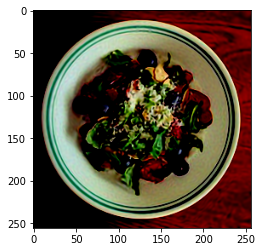

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 440, Total loss 0.005683


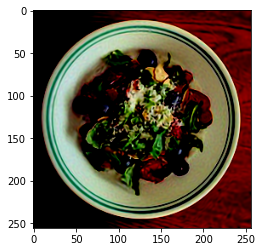

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 460, Total loss 0.005420


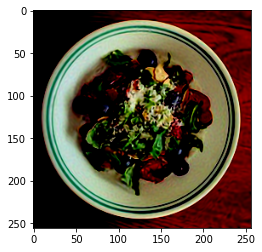

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Step 480, Total loss 0.004997


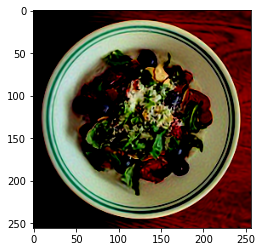

In [18]:
total_steps = 500

optim = torch.optim.Adam(lr=1e-4, params=img_siren.parameters())

model_input, ground_truth = next(iter(dataloader))
# model_input, ground_truth = model_input.cuda(), ground_truth.cuda()
loss_fn = nn.MSELoss()
for step in range(total_steps):
    model_output = img_siren(model_input)
    model_output= model_output.reshape(1, 256, 256, 3)
    loss = loss_fn(model_output, ground_truth)

    if not step%20:
        print("Step %d, Total loss %0.6f" % (step, loss))

        plt.imshow(model_output.cpu().view(256,256,3).detach().numpy())
        plt.show()

    optim.zero_grad()
    loss.backward()
    optim.step()


